# Intermediate Data Visualization with ggplot2

This ggplot2 course builds on your knowledge from the introductory course to produce meaningful explanatory plots. Statistics will be calculated on the fly and you’ll see how Coordinates and Facets aid in communication. You’ll also explore details of data visualization best practices with ggplot2 to help make sure you have a sound understanding of what works and why. By the end of the course, you’ll have all the tools needed to make a custom plotting function to explore a large data set, combining statistics and excellent visuals.



## Statistics

A picture paints a thousand words, which is why R ggplot2 is such a powerful tool for graphical data analysis. In this chapter, you’ll progress from simply plotting data to applying a variety of statistical methods. These include a variety of linear models, descriptive and inferential statistics (mean, standard deviation and confidence intervals) and custom functions.

### Smoothing
To practice on the remaining layers (statistics, coordinates and facets), we'll continue working on several datasets from the first course.

The mtcars dataset contains information for 32 cars from Motor Trends magazine from 1974. This dataset is small, intuitive, and contains a variety of continuous and categorical (both nominal and ordinal) variables.

In the previous course you learned how to effectively use some basic geometries, such as point, bar and line. In the first chapter of this course you'll explore statistics associated with specific geoms, for example, smoothing and lines.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


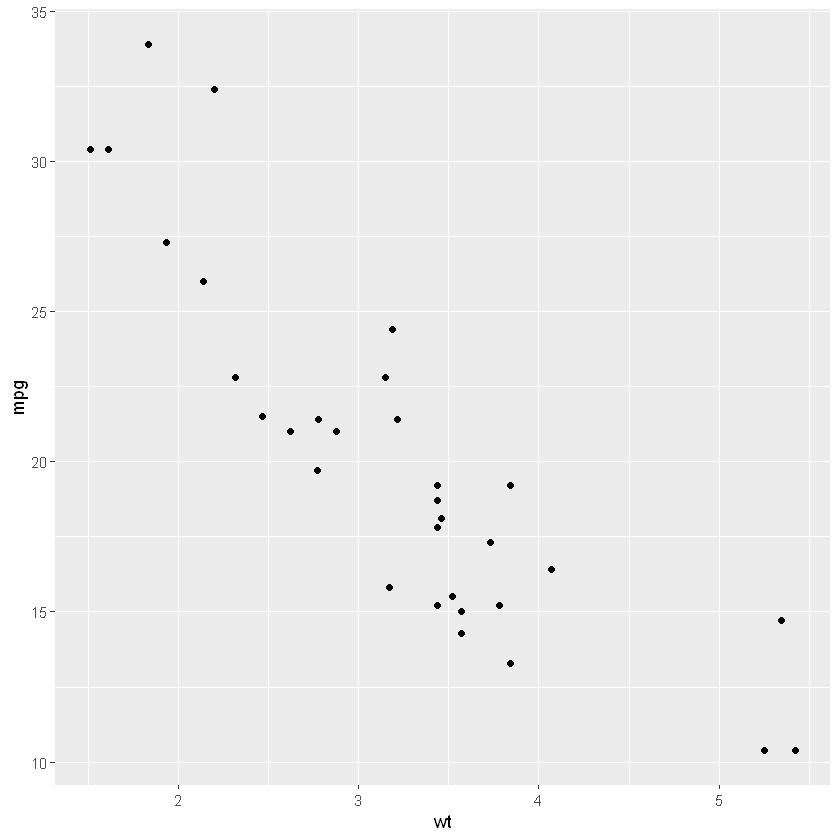

In [3]:
library(ggplot2)

# View the structure of mtcars
str(mtcars)

# Using mtcars, draw a scatter plot of mpg vs. wt
ggplot(mtcars, aes(wt, mpg)) + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


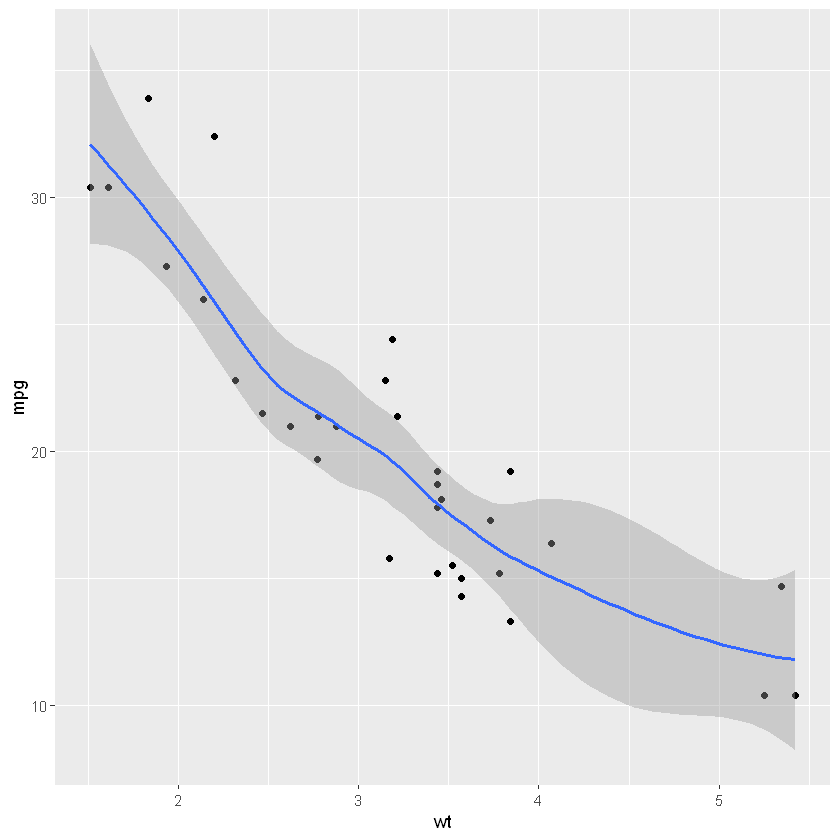

In [3]:
# Amend the plot to add a smooth layer
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() + geom_smooth()

`geom_smooth()` using formula 'y ~ x'


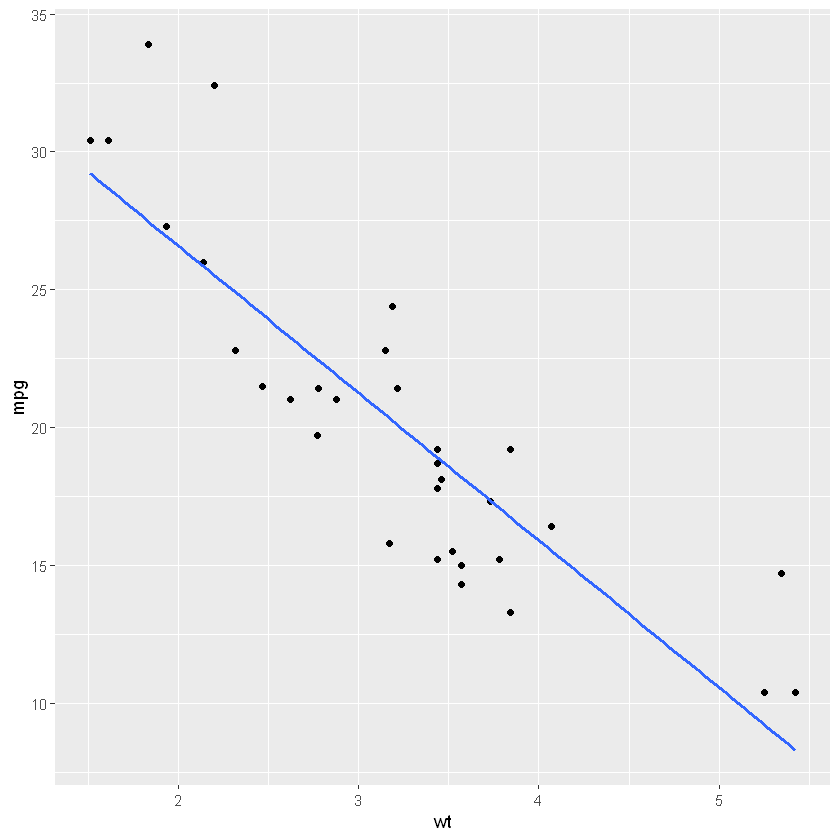

In [4]:
# Amend the plot. Use lin. reg. smoothing; turn off std err ribbon
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'


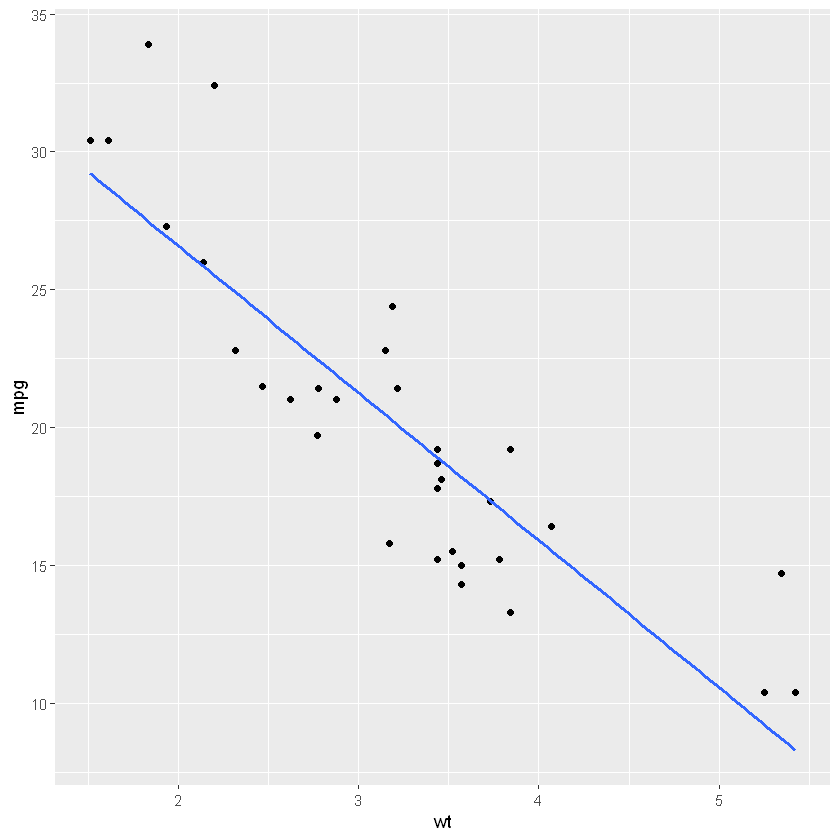

In [5]:
# Amend the plot. Swap geom_smooth() for stat_smooth().
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

### Grouping variables
We'll continue with the previous exercise by considering the situation of looking at sub-groups in our dataset. For this we'll encounter the invisible group aesthetic.

`geom_smooth()` using formula 'y ~ x'


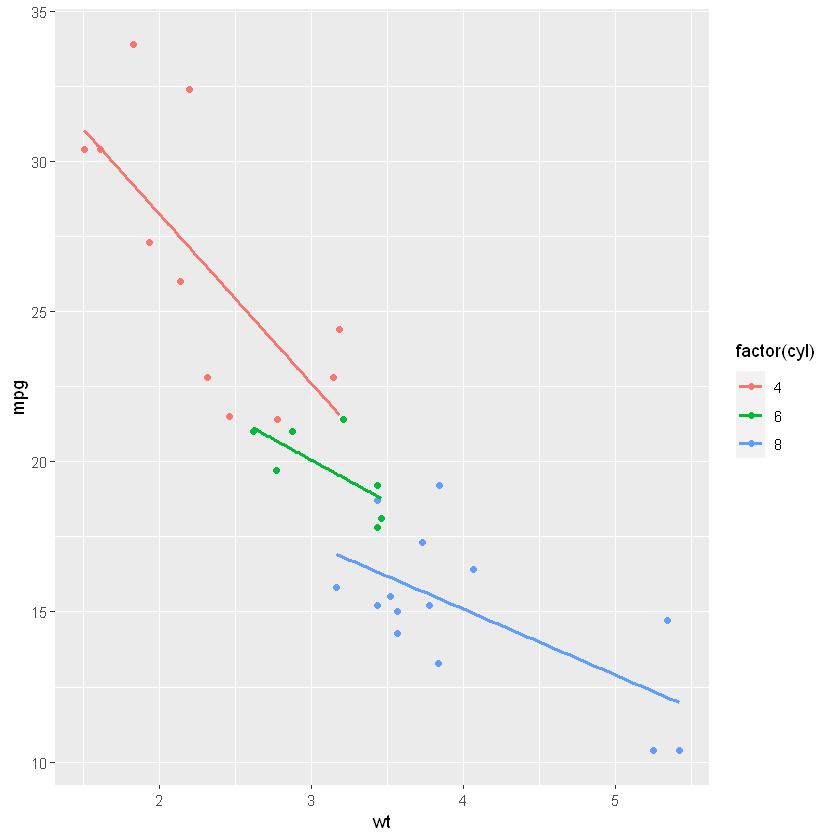

In [7]:
# Using mtcars, plot mpg vs. wt, colored by fcyl
ggplot(mtcars, aes(wt, mpg, color = factor(cyl))) +
  # Add a point layer
  geom_point() +
  # Add a smooth lin reg stat, no ribbon
  stat_smooth(method = "lm", se = FALSE)

### Modifying stat_smooth
In the previous exercise we used se = FALSE in stat_smooth() to remove the 95% Confidence Interval. Here we'll consider another argument, span, used in LOESS smoothing, and we'll take a look at a nice scenario of properly mapping different models.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


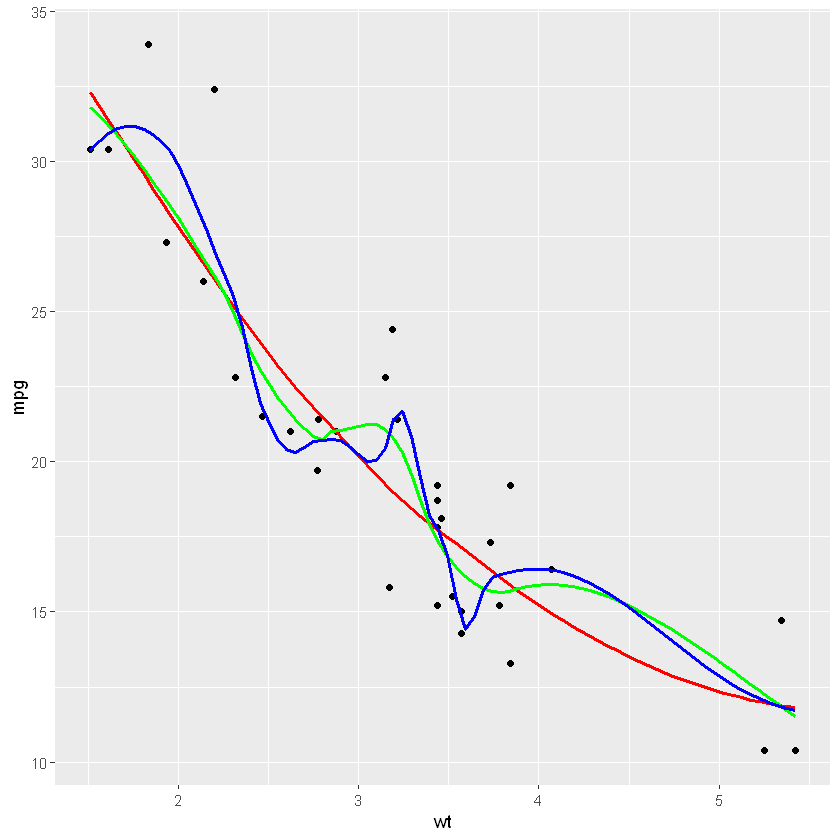

In [9]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add 3 smooth LOESS stats, varying span & color
  stat_smooth(se = FALSE, color = "red", span = 0.9) +
  stat_smooth(se = FALSE, color = "green", span = 0.6) +
  stat_smooth(se = FALSE, color = "blue", span = 0.3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


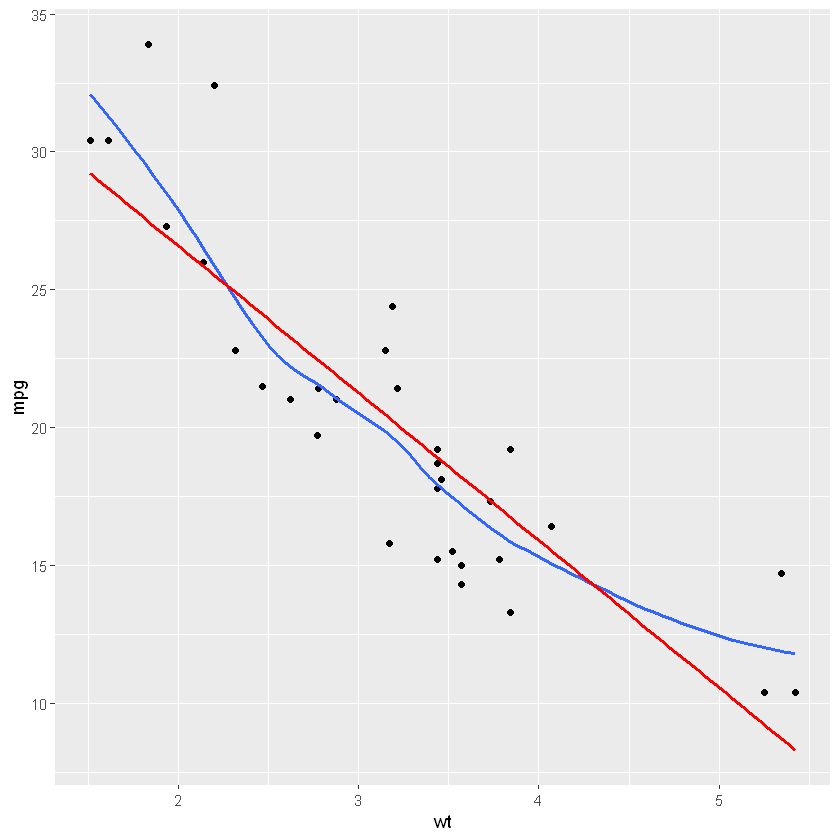

In [10]:
# Amend the plot to color by fcyl
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add a smooth LOESS stat, no ribbon
  stat_smooth(se = FALSE) +
  # Add a smooth lin. reg. stat, no ribbon
  stat_smooth(method = "lm", se = FALSE, color ="red")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


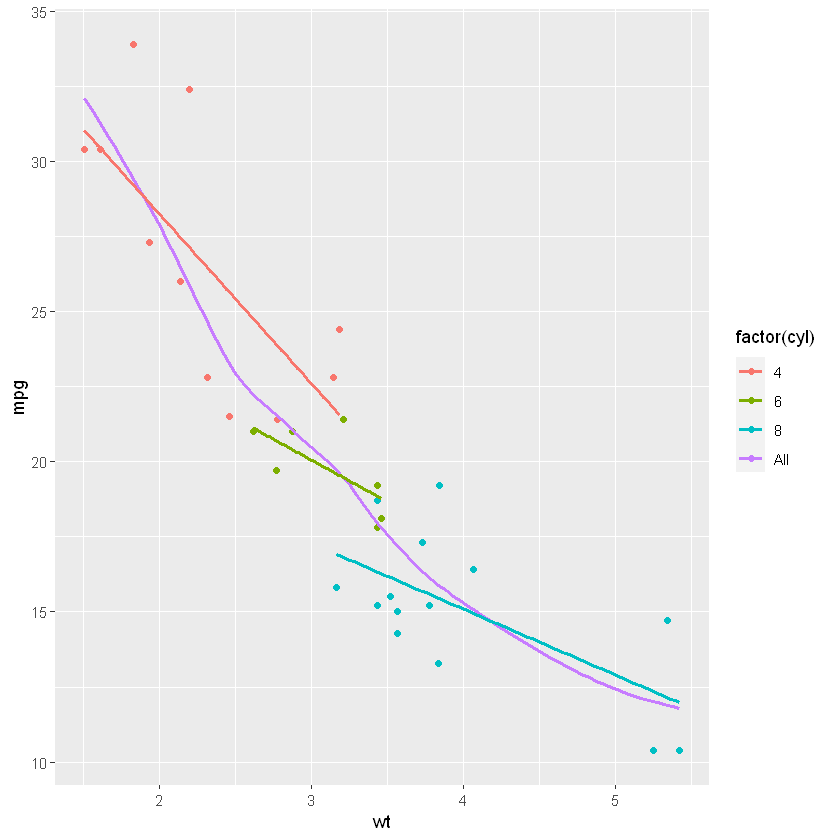

In [12]:
# Amend the plot
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(cyl))) +
  geom_point() +
  # Map color to dummy variable "All"
  stat_smooth(se = FALSE, aes(color = "All")) +
  stat_smooth(method = "lm", se = FALSE)

### Quantiles
Here, we'll continue with the Vocab dataset and use stat_quantile() to apply a quantile regression.

Linear regression predicts the mean response from the explanatory variables, quantile regression predicts a quantile response (e.g. the median) from the explanatory variables. Specific quantiles can be specified with the quantiles argument.

Specifying many quantiles and color your models according to year can make plots too busy. We'll explore ways of dealing with this in the next chapter.

In [15]:
# packageurl <- "http://cran.r-project.org/src/contrib/Archive/Rcpp/Rcpp_1.0.6.tar.gz"
# install.packages(packageurl, repos=NULL, type="source")
# install.packages("quantreg")
# library(quantreg)

# ggplot(mtcars, aes(x = wt, y = mpg)) +
  # geom_point() +
  # Add a quantile stat, at 0.05, 0.5, and 0.95
  # geom_quantile(quantiles = c(0.05, 0.5, 0.95)) # requires Rcpp >= 1.0.3


### Using stat_sum

stat_sum() calculates the total number of overlapping observations and maps that onto the size aesthetic.

stat_sum() allows a special variable, ..prop.., to show the proportion of values within the dataset.

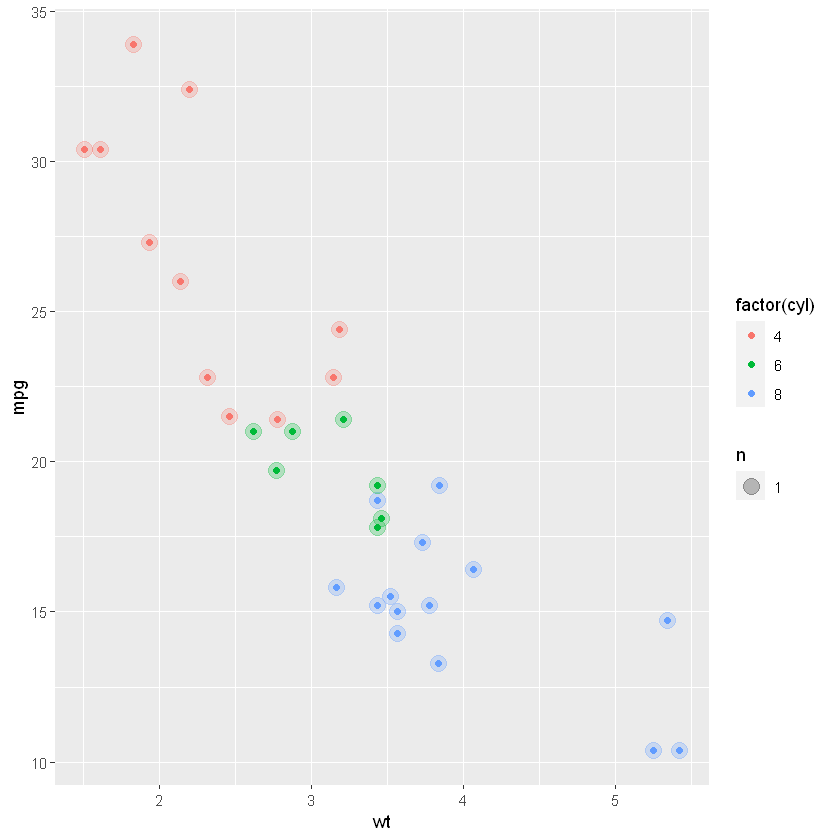

In [16]:
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(cyl))) +
  geom_point() + stat_sum(alpha = 0.25)
  #   stat_sum(aes(size = ..prop..)), to use proportion sizes

### Preparations
In the following exercises, we'll aim to make the plot shown in the viewer. Here, we'll establish our positions and base layer of the plot.

Establishing these items as independent objects will allow us to recycle them easily in many layers, or plots.

position_jitter() adds jittering (e.g. for points).

position_dodge() dodges geoms, (e.g. bar, col, boxplot, violin, errorbar, pointrange).

position_jitterdodge() jitters and dodges geoms, (e.g. points).

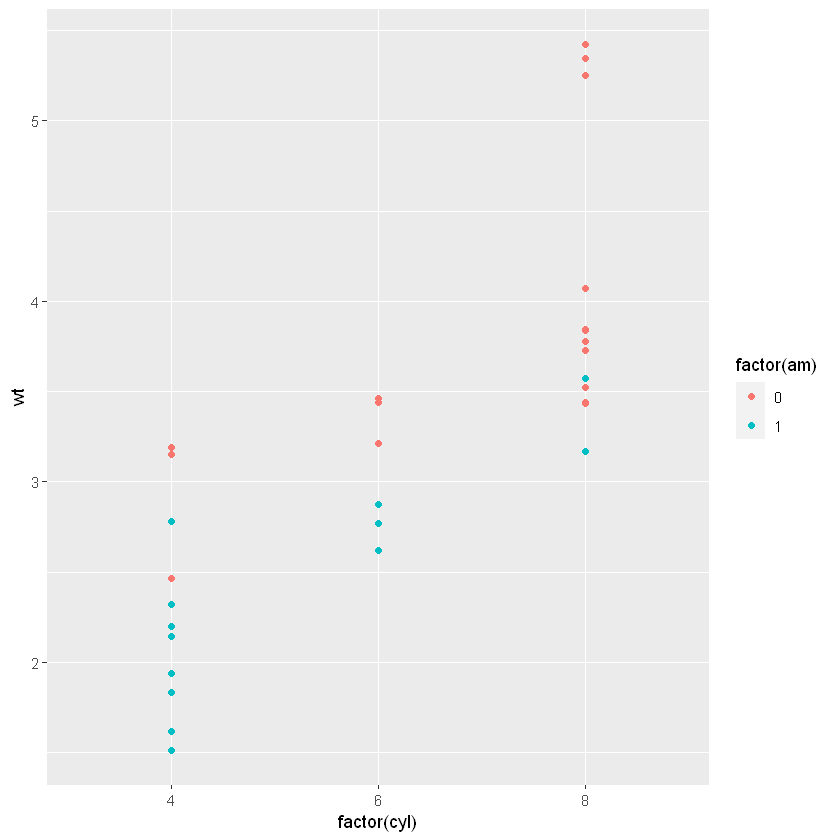

In [23]:
# Define position objects
# 1. Jitter with width 0.2
posn_j <- position_jitter(width = 0.2)

# 2. Dodge with width 0.1
posn_d <- position_dodge(width = 0.1)

# 3. Jitter-dodge with jitter.width 0.2 and dodge.width 0.1
posn_jd <- position_jitterdodge(jitter.width = 0.2, dodge.width = 0.1)

# Create the plot base: wt vs. fcyl, colored by fam
p_wt_vs_fcyl_by_fam <- ggplot(mtcars, aes(factor(cyl), wt, color = factor(am)))

# Add a point layer
p_wt_vs_fcyl_by_fam + geom_point()

### Using position objects
Now that the position objects have been created, you can apply them to the base plot to see their effects. You do this by adding a point geom and setting the position argument to the position object.

The variables from the last exercise, posn_j, posn_d, posn_jd, and p_wt_vs_fcyl_by_fam are available in your workspace.

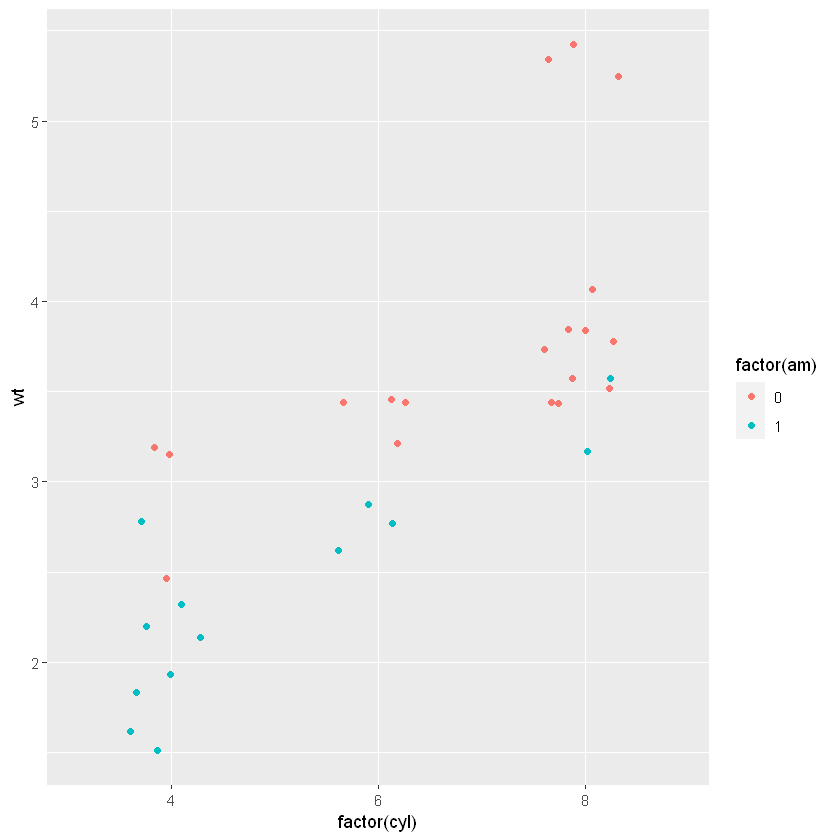

In [31]:
# Add jittering only
p_wt_vs_fcyl_by_fam + geom_point(position = posn_j)

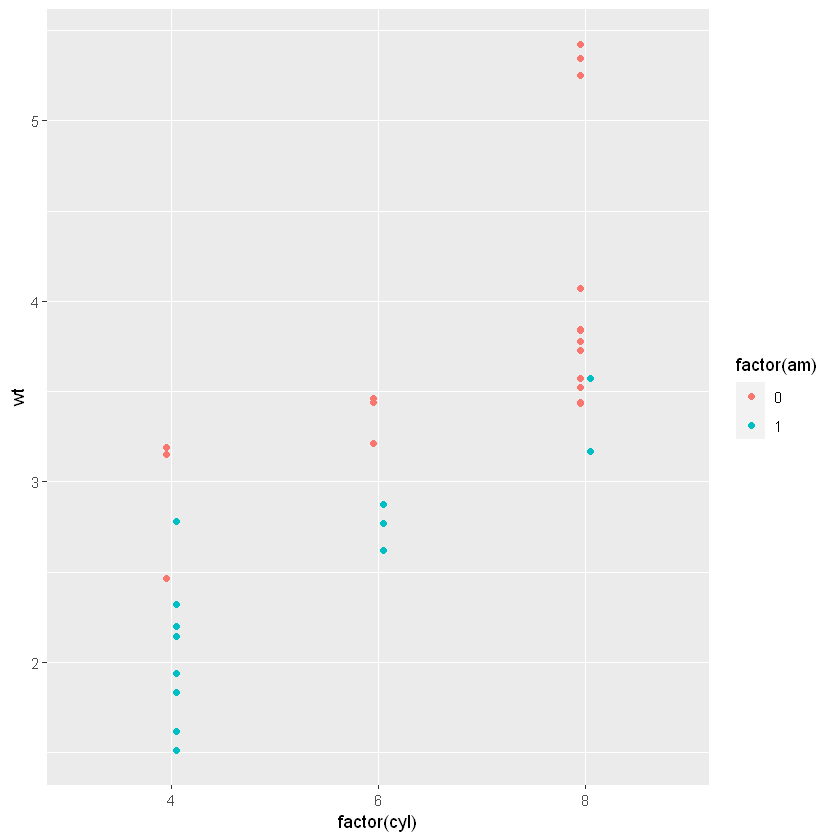

In [32]:
# Add jittering only
p_wt_vs_fcyl_by_fam + geom_point(position = posn_d)

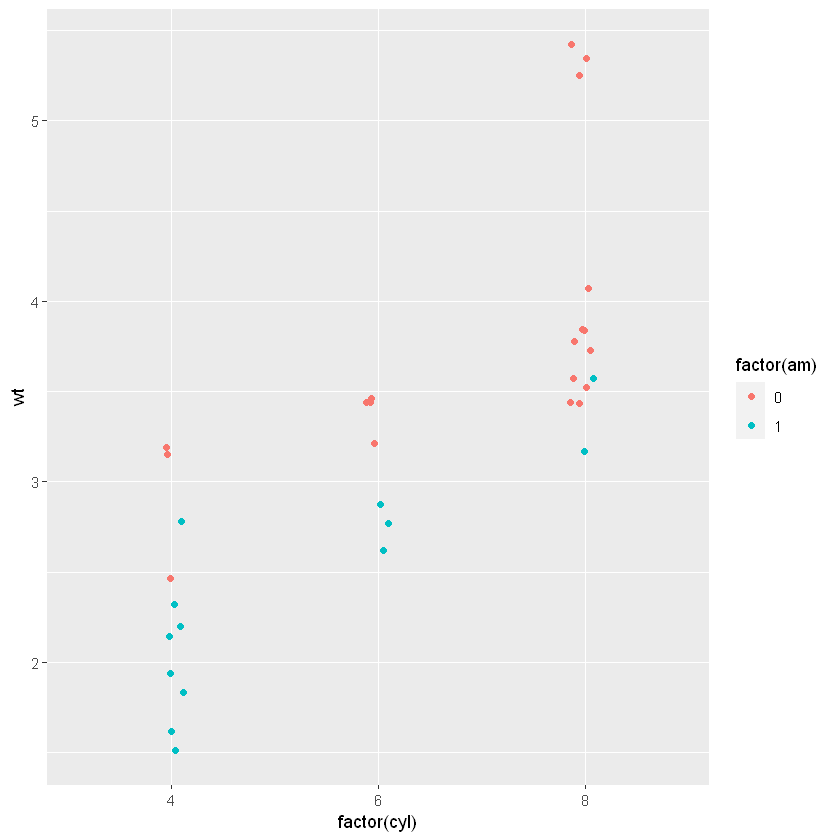

In [33]:
# Add jittering only
p_wt_vs_fcyl_by_fam + geom_point(position = posn_jd)

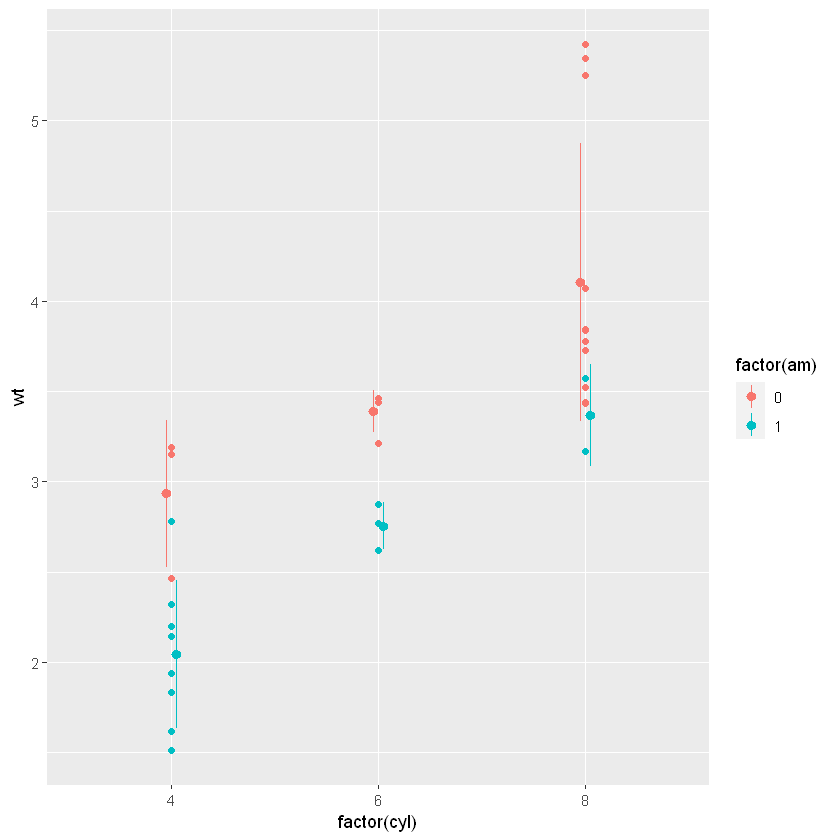

In [37]:
#install.packages("Hmisc")
library(Hmisc)
p_wt_vs_fcyl_by_fam + geom_point() +
  # Add a summary stat of std deviation limits
stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn_d)

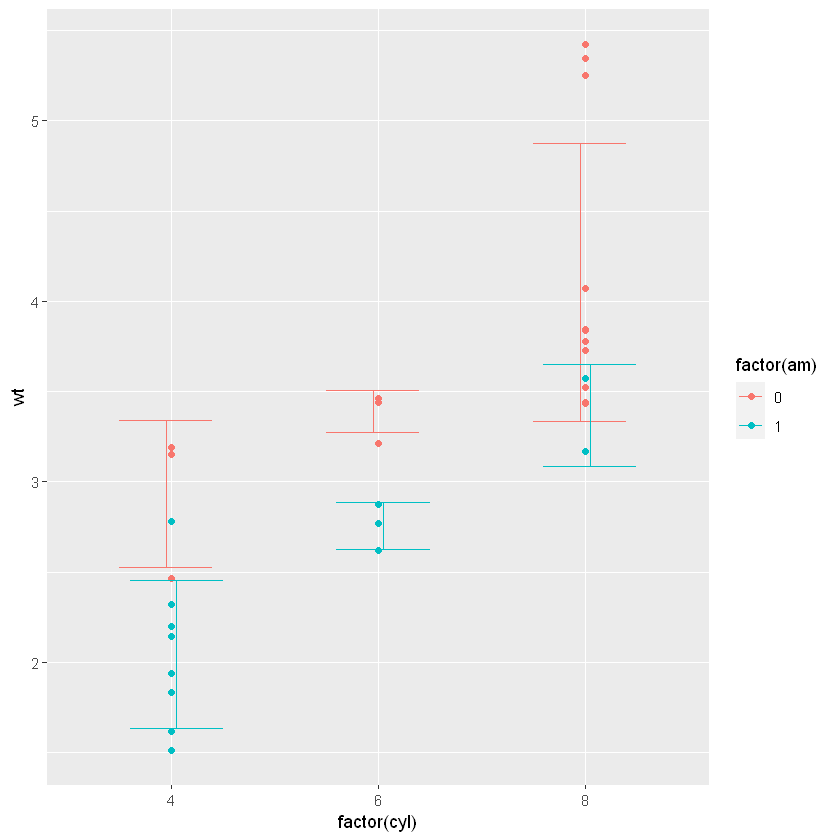

In [40]:
p_wt_vs_fcyl_by_fam + geom_point() +
  # Change the geom to be an errorbar
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn_d, geom = "errorbar")

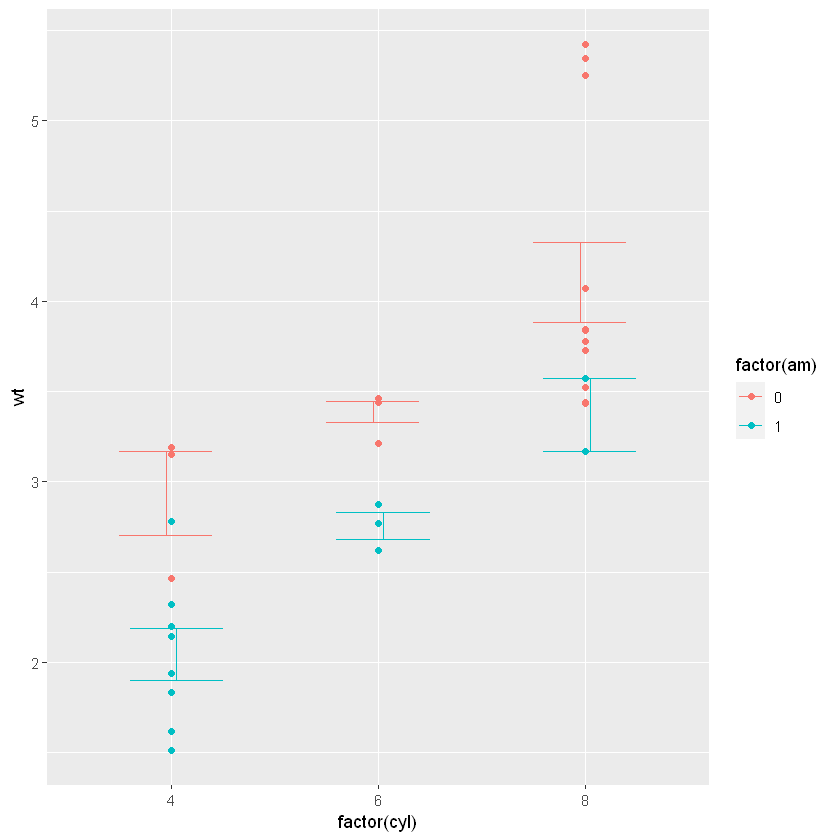

In [44]:
p_wt_vs_fcyl_by_fam + geom_point() + 
  # Add a summary stat of normal confidence limits
  stat_summary(fun.data = mean_cl_normal, fun.args = list(mult = 1), position = posn_d, geom = "errorbar")